##          Московский авиационный институт
###      (Национальный исследовательский университет)
####   Институт №8 «Информационные технологии и прикладная математика»
####        Кафедра вычислительной математики и программирования

  
 
 





            Лабораторная работа №2 
            по курсу «Нейроинформатика».
            
           

 
 
 







                                  Студент: Обыденкова Ю.Ю.
                                  Группа: 80-408Б
                                 


 

                        Москва, 2022

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
class Adaline:
    def Fit(self, X, Y):
        Prediction = self.Predict(X)
        error = Y - Prediction

        self.W += self.lr * np.dot(X[np.newaxis].T, error[np.newaxis])
        self.b += self.lr * error


    def Train(self, x_train, y_train, learning_rate=0.01, epochs=20):
        self.lr = learning_rate
        x_dim = x_train.shape[1]
        y_dim = y_train.shape[1]

        self.W = np.random.sample((x_dim, y_dim))
        self.b = np.random.random(y_dim)

        for i in range(epochs):
            for X, Y in zip(x_train, y_train):
                self.Fit(X, Y)

    def Predict(self, x_to_Predict):
        res = np.dot(x_to_Predict, self.W) + self.b
        return res

    def Weights(self):
        return self.W
    
    def Bias(self):
        return self.b

### Построение и обучение линейной сети с задержками, которая будет выполнять одношаговый прогноз для функции

In [4]:
t_begin1 = 0
t_end1 = 4.5
h1 = 0.025

def phi1(t):
    return np.sin(-2*t*t + 7*t) - 0.5*np.sin(t)

t_begin2 = 0
t_end2 = 6
h2 = 0.025

def phi2(t):
    return np.sin(t*t - 6*t + 3)

def phi(t):
    return 1/3 * np.sin(t*t - 6*t - np.pi/6)


Формирование обучающей выборки.

In [5]:
def data(x, D):
    x_train_list = []
    y_train_list = []
    for i in range(D, x.shape[0]-1):
        x_train_list.append(x[i-D:i])
        #print(x_train_list)
        y_train_list.append([x[i+1]])
    x_train = np.array(x_train_list)
    y_train = np.array(y_train_list)
    return x_train, y_train

def filter_data(x, y, D):
    x_train_list = []
    y_train_list = []
    for i in range(D, x.shape[0]):
        x_train_list.append(x[i-D:i])
        y_train_list.append([y[i]])
    x_train = np.array(x_train_list)
    y_train = np.array(y_train_list)
    return x_train, y_train

def MSE(A, B):
    return ((A - B) ** 2).sum() / A.shape[0]

def RMSE(A, B):
    return np.sqrt(MSE(A, B))

In [6]:
n1 = int((t_end1 - t_begin1) / h1) + 1
t1 = np.linspace(t_begin1, t_end1, num=n1)

x1 = phi1(t1)

D1 = 5
x_train, y_train = data(x1, D1)

approximator = Adaline()
approximator.Train(x_train, y_train, learning_rate=0.01, epochs=50)

print("WEIGHTS:")
print(approximator.Weights())
print("BIASES:")
print(approximator.Bias())

pred1 = approximator.Predict(x_train)
exp1 = y_train

rmse_metric = RMSE(pred1, exp1)
print(f'RMSE: {rmse_metric}')

WEIGHTS:
[[-0.75584504]
 [-0.15456819]
 [ 0.55210554]
 [ 0.24268034]
 [ 0.8854206 ]]
BIASES:
[0.01668242]
RMSE: 0.18097190362080448


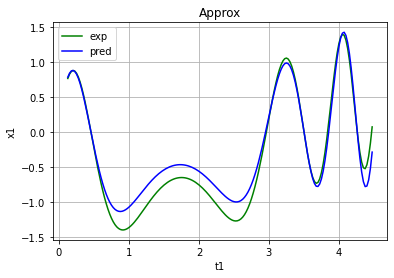

In [7]:
fig, ax = plt.subplots()
ax.plot(t1[D1:-1], exp1, 'g', label='exp')
ax.plot(t1[D1:-1], pred1, 'b', label='pred')

ax.set(xlabel='t1', ylabel='x1', title='Approx')
ax.grid()
ax.legend()

### Построение и обучение линейной сети с задержками, которая будет выполнять многошаговый прогноз для функции

Weights:
[[-0.75584504]
 [-0.15456819]
 [ 0.55210554]
 [ 0.24268034]
 [ 0.8854206 ]]
Bias:
[0.01668242]


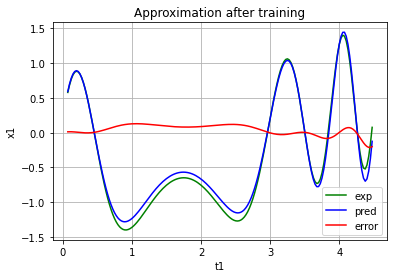

In [8]:
D2 = 3
x_train2, y_train2 = data(x1, D2)

Predictor = Adaline()

Predictor.Train(x_train2, y_train2, epochs=600)
print("Weights:")
print(approximator.Weights())
print("Bias:")
print(approximator.Bias())

pred2 = Predictor.Predict(x_train2)
exp2 = y_train2

error2 = pred2 - exp2

fig, ax = plt.subplots()
ax.plot(t1[D2:-1], exp2, 'g', label='exp')
ax.plot(t1[D2:-1], pred2, 'b', label='pred')
ax.plot(t1[D2:-1], error2, 'r', label='error')

ax.set(xlabel='t1', ylabel='x1', title='Approximation after training')
ax.grid()
ax.legend()


Добавим во временную последовательность 20 новых значений

RMSE on train data: 0.08423793879238592
RMSE on appended data: 0.1550300705257035


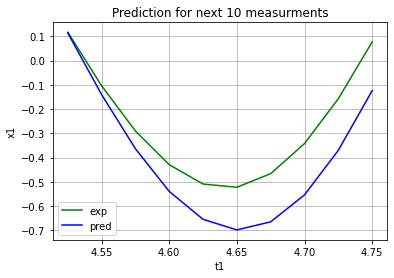

In [21]:
RMSE_metric = RMSE(pred2, exp2)
print(f'RMSE on train data: {RMSE_metric}')

n_append = 10
t1 = np.append(t1, np.array([t_end1 + (i+1) * h1 for i in range(n_append)]))

x, y = data(x1, D2)

pred_ = Predictor.Predict(x)
exp_ = y

fig, ax = plt.subplots()

ax.plot(t1[-n_append:], exp_[-n_append:], 'g', label='exp')
ax.plot(t1[-n_append:], pred_[-n_append:], 'b', label='pred')

ax.set(xlabel='t1', ylabel='x1', title='Prediction for next 10 measurments')
ax.grid()
ax.legend()

RMSE_metric = RMSE(exp_[-n_append:], pred_[-n_append:])
print(f'RMSE on appended data: {RMSE_metric}')

### Построение и обучение линейной сети, которая является адаптивным линейным фильтром

n2=241
Weights:
[[-0.75584504]
 [-0.15456819]
 [ 0.55210554]
 [ 0.24268034]
 [ 0.8854206 ]]
Bias:
[0.01668242]


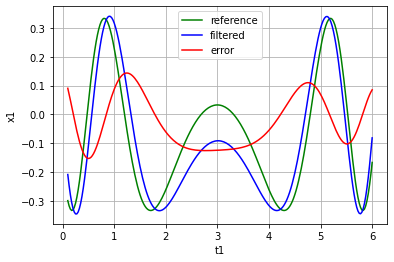

In [19]:
n2 = int((t_end2 - t_begin2) / h2) + 1
print(f'{n2=}')
t2 = np.linspace(t_begin2, t_end2, num=n2)

x3 = phi2(t2)
y3 = phi(t2)

D3 = 4
x_train3, y_train3 = filter_data(x3, y3, D3)

#print(x_train3[:5])
#print(y_train3[:5])

adaptive_filter = Adaline()
adaptive_filter.Train(x_train3, y_train3,0.01,50)

print("Weights:")
print(approximator.Weights())
print("Bias:")
print(approximator.Bias())

pred3 = adaptive_filter.Predict(x_train3)
exp3 = y_train3

error3 = pred3 - exp3

fig, ax = plt.subplots()
ax.plot(t2[D3:], exp3, 'g', label='reference')
ax.plot(t2[D3:], pred3, 'b', label='filtered')
ax.plot(t2[D3:], error3, 'r', label='error')

ax.set(xlabel='t1', ylabel='x1', title='')
ax.grid()
ax.legend()

In [20]:
RMSE_metric = RMSE(pred3, exp3)
print(f'RMSE: {RMSE_metric}')

RMSE: 0.09351998357050242
